In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [4]:
import pandas_profiling

In [5]:
travel_data = pandas_profiling.ProfileReport(df)

In [6]:
print(travel_data)

In [7]:
Num_value = [fea for fea in df.columns if df[fea].dtypes!='O']

In [8]:
cat_value = [fea for fea in df.columns if df[fea].dtypes == 'O']

In [9]:
print(Num_value)

['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']


In [10]:
print(cat_value)

['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [11]:
#Pipelining for the Data Cleaning
# 1. Handiling the Missing value
# 2. Outlinear in the data set
# 3. Scalling in the dataset
# 4. Encoding in the data set

# Handiling the Missing value

In [12]:
df.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [13]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

Observation :

In the dataset it have a huge amount of missing value

Age has 226 missing value

Duration of Pitch has 251 missing value

Number of trips has 140 missing value

Monthly Income has 233 missing value

In [14]:
df['TypeofContact']

0          Self Enquiry
1       Company Invited
2          Self Enquiry
3       Company Invited
4          Self Enquiry
             ...       
4883       Self Enquiry
4884    Company Invited
4885       Self Enquiry
4886       Self Enquiry
4887       Self Enquiry
Name: TypeofContact, Length: 4888, dtype: object

In [15]:
df['TypeofContact'].unique()

array(['Self Enquiry', 'Company Invited', nan], dtype=object)

In [16]:
df['TypeofContact'].fillna('Others').head(15)

0        Self Enquiry
1     Company Invited
2        Self Enquiry
3     Company Invited
4        Self Enquiry
5     Company Invited
6        Self Enquiry
7        Self Enquiry
8     Company Invited
9        Self Enquiry
10       Self Enquiry
11       Self Enquiry
12       Self Enquiry
13       Self Enquiry
14       Self Enquiry
Name: TypeofContact, dtype: object

In [17]:
df['NumberOfFollowups']

0       3.0
1       4.0
2       4.0
3       3.0
4       3.0
       ... 
4883    5.0
4884    5.0
4885    4.0
4886    4.0
4887    4.0
Name: NumberOfFollowups, Length: 4888, dtype: float64

In [18]:
df['NumberOfFollowups'].unique()

array([ 3.,  4.,  2.,  5., nan,  1.,  6.])

In [19]:
m= df['NumberOfFollowups'].mean()

In [20]:
df['NumberOfFollowups'].replace(np.NaN ,  m).head(15)

0     3.0
1     4.0
2     4.0
3     3.0
4     3.0
5     3.0
6     2.0
7     3.0
8     4.0
9     3.0
10    2.0
11    4.0
12    3.0
13    3.0
14    4.0
Name: NumberOfFollowups, dtype: float64

In [21]:
df['NumberOfFollowups'].unique()

array([ 3.,  4.,  2.,  5., nan,  1.,  6.])

In [22]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [23]:
df['MonthlyIncome'].unique()

array([20993., 20130., 17090., ..., 22097., 22995., 21471.])

In [24]:
MI = df['MonthlyIncome'].mean()

In [25]:
print(MI)

23619.85349087003


In [26]:
df['MonthlyIncome'].replace(np.NaN ,  MI).head(15)

0     20993.000000
1     20130.000000
2     17090.000000
3     17909.000000
4     18468.000000
5     18068.000000
6     17670.000000
7     17693.000000
8     24526.000000
9     20237.000000
10    17426.000000
11    23619.853491
12    17911.000000
13    17661.000000
14    17028.000000
Name: MonthlyIncome, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [28]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [29]:
df['NumberOfTrips'].unique()

array([ 1.,  2.,  7.,  5.,  6.,  3.,  4., 19., 21.,  8., nan, 20., 22.])

In [30]:
NT = df['NumberOfTrips'].mean()

In [31]:
df['NumberOfTrips'].replace(np.NaN,NT)

0       1.0
1       2.0
2       7.0
3       2.0
4       1.0
       ... 
4883    2.0
4884    3.0
4885    7.0
4886    3.0
4887    3.0
Name: NumberOfTrips, Length: 4888, dtype: float64

In [32]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [33]:
df['Age'].unique()

array([41., 49., 37., 33., nan, 32., 59., 30., 38., 36., 35., 31., 34.,
       28., 29., 22., 53., 21., 42., 44., 46., 39., 24., 43., 50., 27.,
       26., 48., 55., 45., 56., 23., 51., 40., 54., 58., 20., 25., 19.,
       57., 52., 47., 18., 60., 61.])

In [34]:
df['Age'].mean()

37.62226512226512

In [35]:
df['Age'].replace(np.NaN , df['Age'].mean()).head(15)

0     41.000000
1     49.000000
2     37.000000
3     33.000000
4     37.622265
5     32.000000
6     59.000000
7     30.000000
8     38.000000
9     36.000000
10    35.000000
11    37.622265
12    31.000000
13    34.000000
14    28.000000
Name: Age, dtype: float64

In [36]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [37]:
df['PreferredPropertyStar'].head(10)

0    3.0
1    4.0
2    3.0
3    3.0
4    4.0
5    3.0
6    5.0
7    3.0
8    3.0
9    3.0
Name: PreferredPropertyStar, dtype: float64

In [38]:
df.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [39]:
df['Occupation'].head(15)

0           Salaried
1           Salaried
2        Free Lancer
3           Salaried
4     Small Business
5           Salaried
6     Small Business
7           Salaried
8           Salaried
9     Small Business
10    Small Business
11          Salaried
12          Salaried
13    Small Business
14          Salaried
Name: Occupation, dtype: object

In [40]:
df['Occupation'].unique()

array(['Salaried', 'Free Lancer', 'Small Business', 'Large Business'],
      dtype=object)

In [41]:
df['Occupation'].fillna('others').head(15)

0           Salaried
1           Salaried
2        Free Lancer
3           Salaried
4     Small Business
5           Salaried
6     Small Business
7           Salaried
8           Salaried
9     Small Business
10    Small Business
11          Salaried
12          Salaried
13    Small Business
14          Salaried
Name: Occupation, dtype: object

In [42]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [43]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [44]:
df['DurationOfPitch'].head(5)

0     6.0
1    14.0
2     8.0
3     9.0
4     8.0
Name: DurationOfPitch, dtype: float64

# Outliers in Datasets

In [45]:
# Univariate Analysis of Numerical Dataset

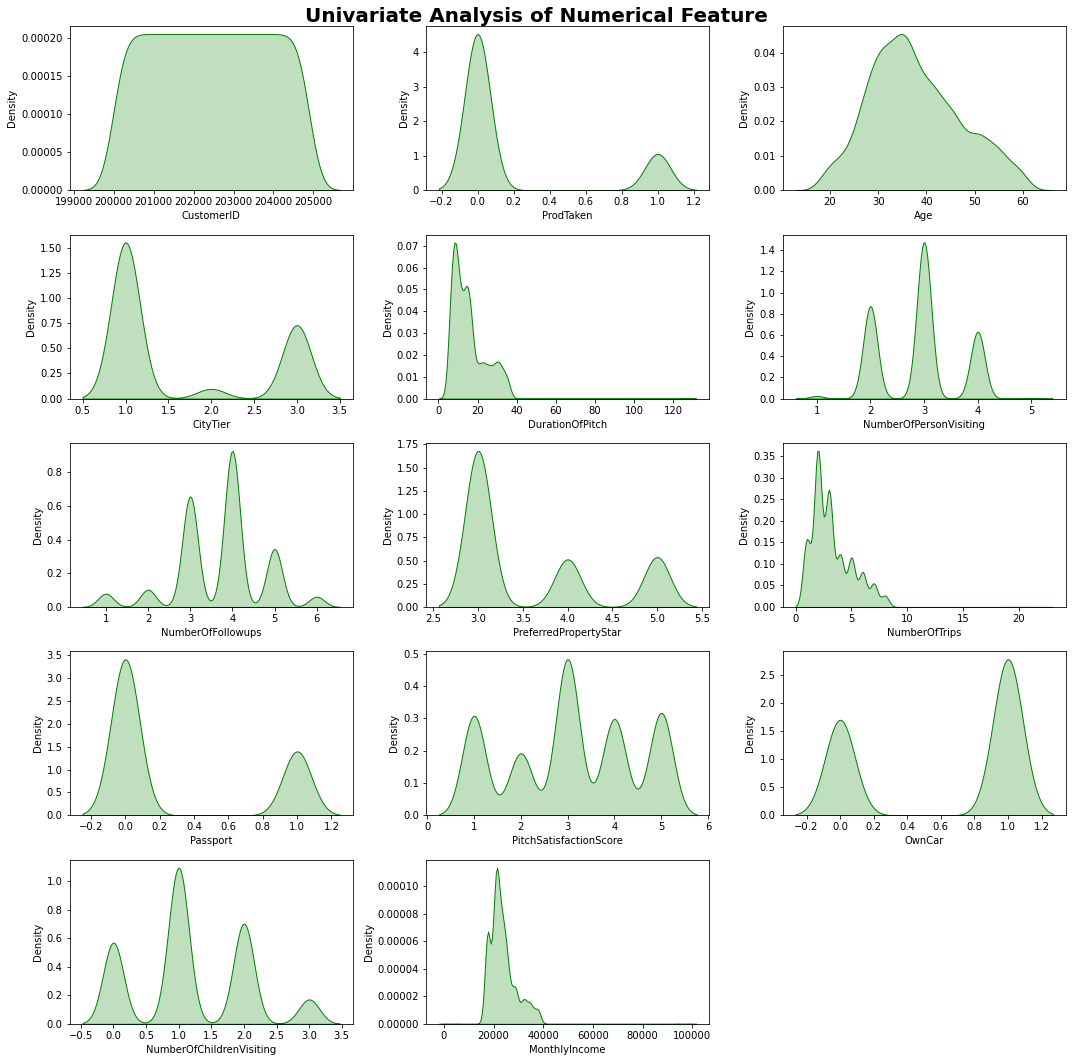

In [46]:
plt.figure(figsize = (15,15))
plt.suptitle("Univariate Analysis of Numerical Feature",fontsize = 20,fontweight = 'bold')

for i in range(0,len(Num_value)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = df[Num_value[i]],shade = True,color = 'g')
    plt.xlabel(Num_value[i])
    plt.tight_layout()

In [47]:
#Univariate Analysis of Character Dataset

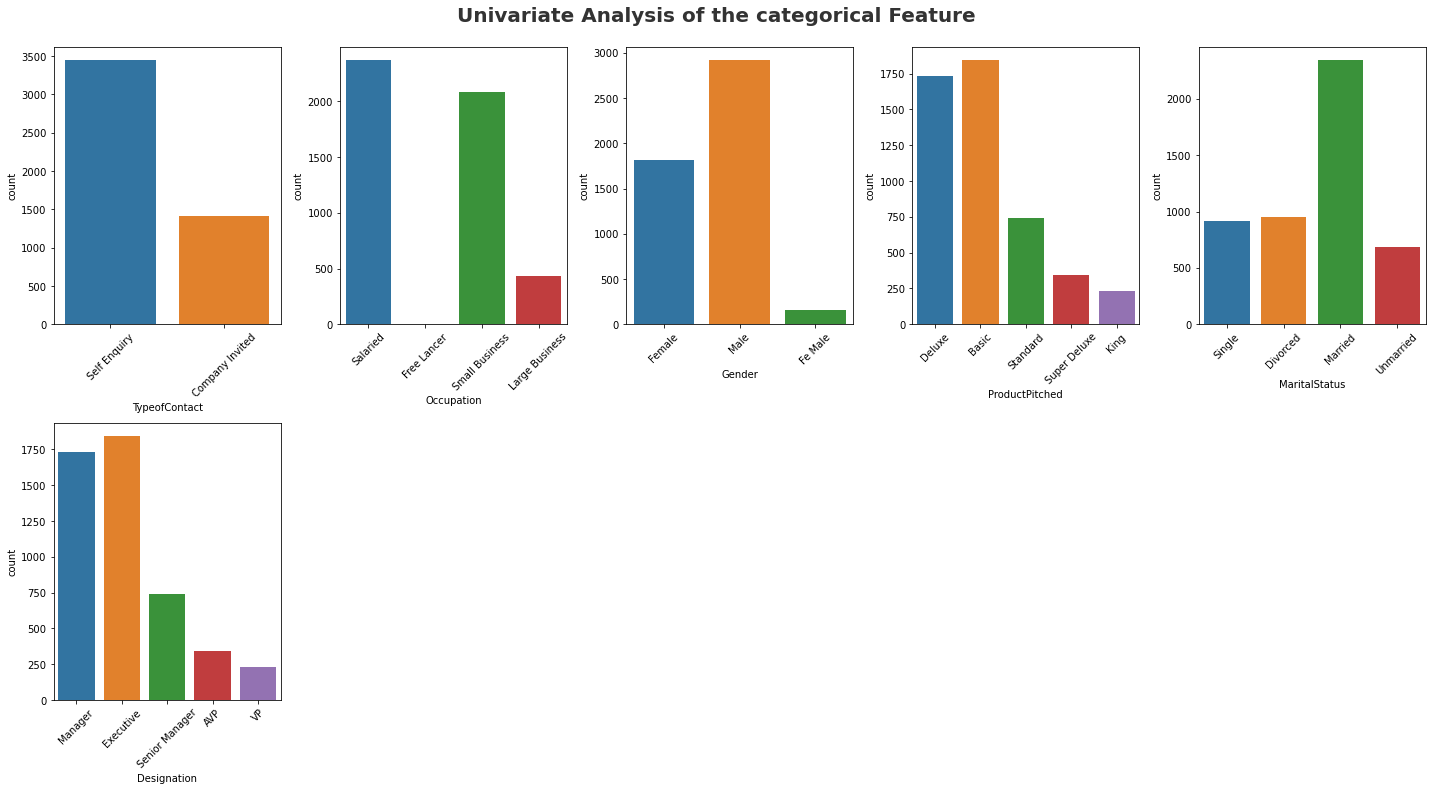

In [48]:
plt.figure(figsize = (20,15))
plt.suptitle("Univariate Analysis of the categorical Feature",fontsize = 20 , fontweight='bold',alpha=0.8,y=1)

for i in range(0,len(cat_value)):
    plt.subplot(3,5,i+1)
    sns.countplot(x=df[cat_value[i]])
    plt.xlabel(cat_value[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In this character plot it shows that in the occupation Free Lancer don

In [49]:
#Mulivariate Analysis 

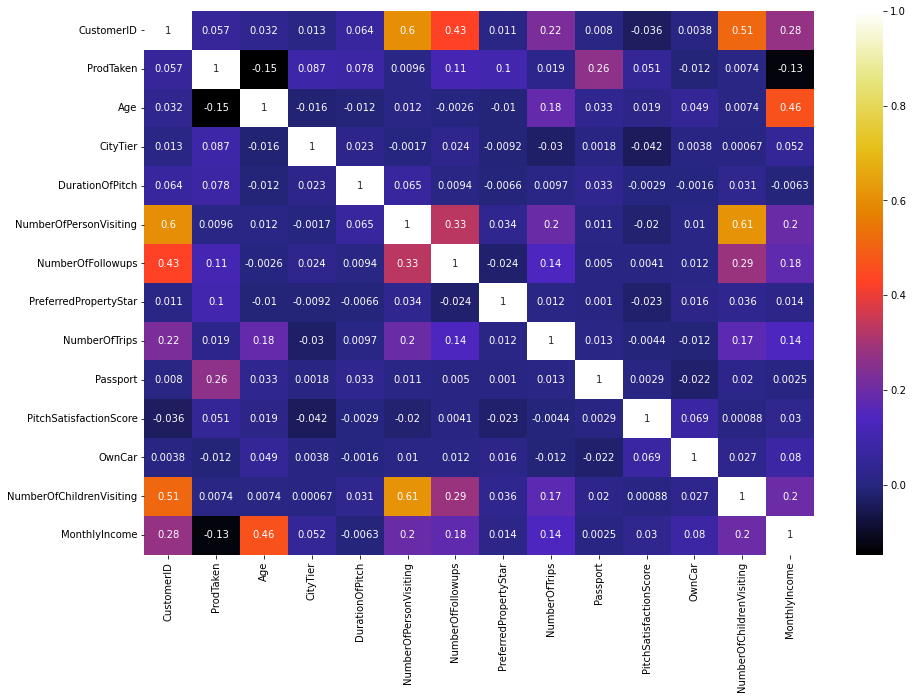

In [50]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),cmap = "CMRmap",annot = True)
plt.show()

In [51]:
#Observation

In [52]:
df.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


<AxesSubplot:>

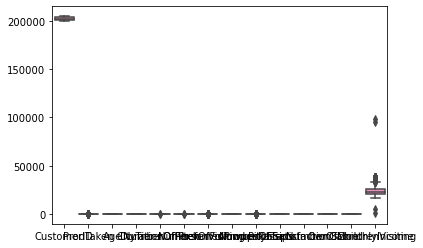

In [53]:
sns.boxplot(data = df )

In [54]:
for i in df:
    sns.boxplot(i[2:])

C:\Users\aswin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'stomerID'